# **Weather Prediction**

Kaggle Dataset Link:
https://www.kaggle.com/datasets/ananthr1/weather-prediction

In [1]:
from google.colab import files
uploaded = files.upload()

Saving seattle-weather.csv to seattle-weather.csv


In [2]:
import io
import pandas as pd
df = pd.read_csv(io.BytesIO(uploaded['seattle-weather.csv']))

In [3]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 2.8 MB/s 


# **Data Preparation**

In [4]:
#Modules Import
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import category_encoders as ce
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import tree
import graphviz
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict
from sklearn import model_selection
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

In [5]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [6]:
df.shape

(1461, 6)

In [7]:
df.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [9]:
col_names = list(df.columns)
print(col_names)
for col in col_names:
  print(df[col].value_counts()) 

['date', 'precipitation', 'temp_max', 'temp_min', 'wind', 'weather']
2012-01-01    1
2014-09-09    1
2014-09-07    1
2014-09-06    1
2014-09-05    1
             ..
2013-04-30    1
2013-04-29    1
2013-04-28    1
2013-04-27    1
2015-12-31    1
Name: date, Length: 1461, dtype: int64
0.0     838
0.3      54
0.5      40
1.0      26
1.5      25
       ... 
30.0      1
26.4      1
19.1      1
46.7      1
21.8      1
Name: precipitation, Length: 111, dtype: int64
 11.1    58
 14.4    49
 10.0    47
 12.8    46
 12.2    44
         ..
-0.5      1
-1.6      1
 35.6     1
-1.1      1
 35.0     1
Name: temp_max, Length: 67, dtype: int64
 6.1     66
 10.0    64
 11.7    60
 7.2     60
 13.3    58
 11.1    56
 4.4     55
 13.9    54
 9.4     53
 8.3     52
 15.0    51
 8.9     51
 5.6     50
 6.7     47
 14.4    46
 7.8     46
 12.2    45
 2.8     45
 12.8    45
 3.3     44
 3.9     44
 5.0     41
 10.6    37
 1.7     30
 0.6     28
 1.1     27
 15.6    27
 2.2     24
 16.1    23
 0.0     16
 16.

In [10]:
df['weather'].value_counts()

rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: weather, dtype: int64

In [11]:
# check for missing values in dataset
df.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

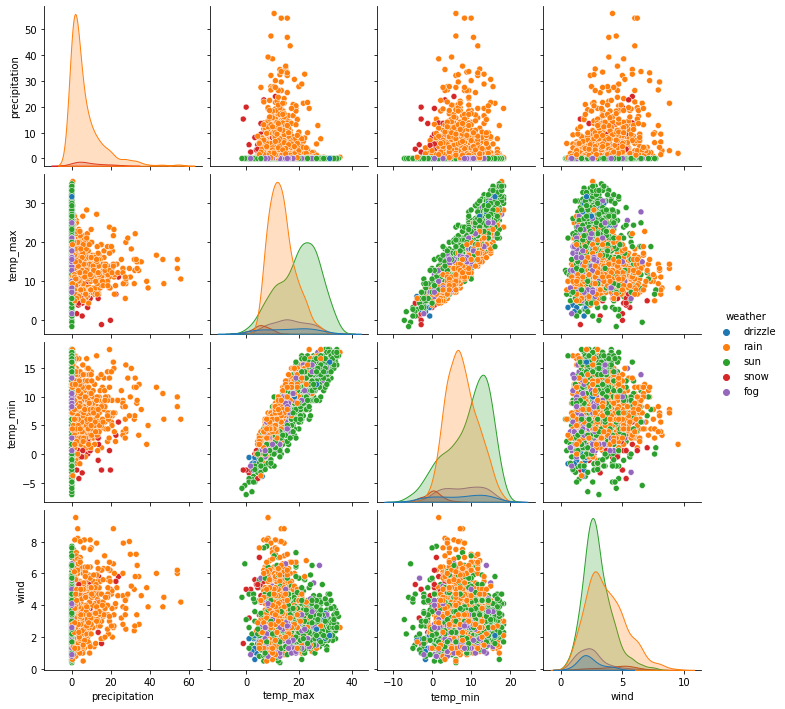

In [12]:
sns.pairplot(data = df, hue = 'weather')

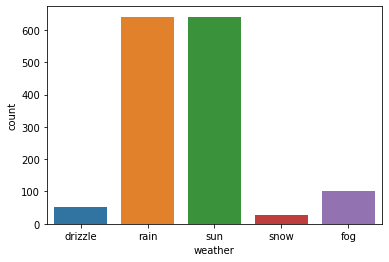

In [13]:
sns.countplot(data = df, x = 'weather')

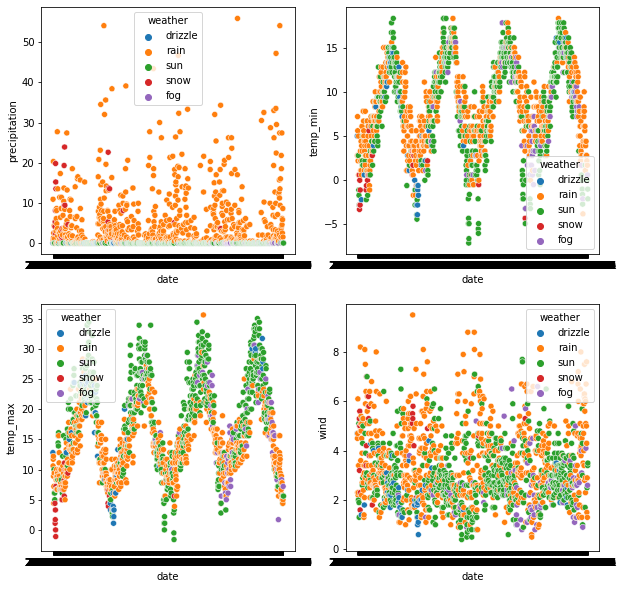

In [14]:
fig,axes = plt.subplots(2, 2, figsize=(10, 10))
col = ['precipitation', 'temp_max', 'temp_min', 'wind']
for i in range(4):
    sns.scatterplot(data = df, x = 'date', y = col[i], hue = 'weather', ax = axes[i%2, i//2])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

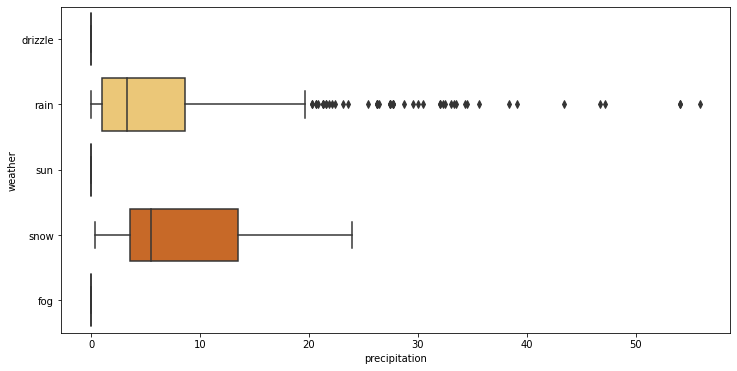

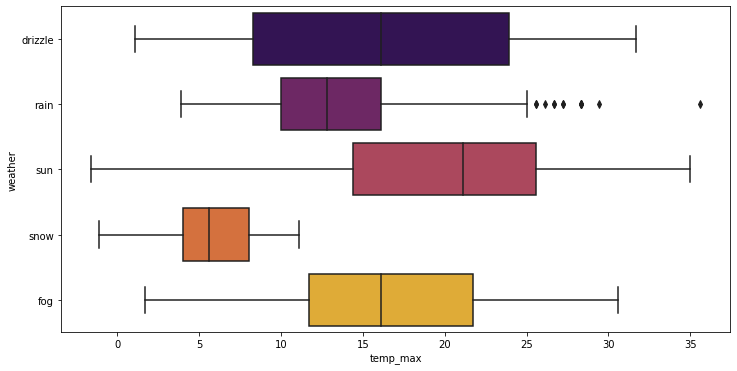

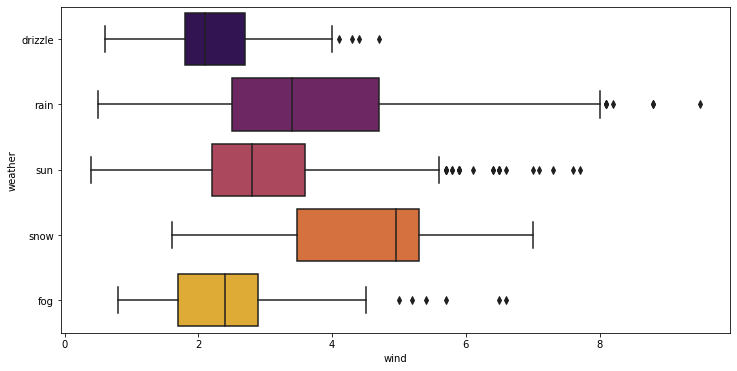

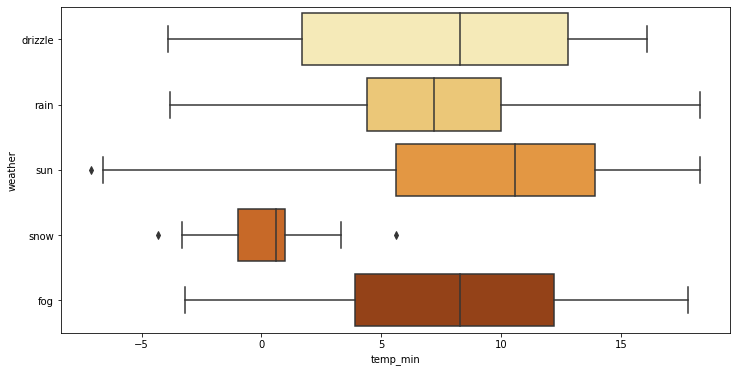

In [15]:
plt.figure(figsize=(12,6))
sns.boxplot("precipitation", "weather",data = df, palette = "YlOrBr")
plt.figure(figsize=(12,6))
sns.boxplot("temp_max", "weather", data = df, palette = "inferno")
plt.figure(figsize=(12,6))
sns.boxplot("wind", "weather",data = df, palette = "inferno")
plt.figure(figsize=(12,6))
sns.boxplot("temp_min", "weather",data = df, palette = "YlOrBr")

In [16]:
df = df.drop(["date"],axis=1)
#removing outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1
df = df[~((df < (Q1 - 1.5 * IQR))|(df > (Q3 + 1.5 * IQR))).any(axis=1)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  


In [17]:
#Skewed Distribution Treatment
df.precipitation = np.sqrt(df.precipitation)
df.wind = np.sqrt(df.wind)

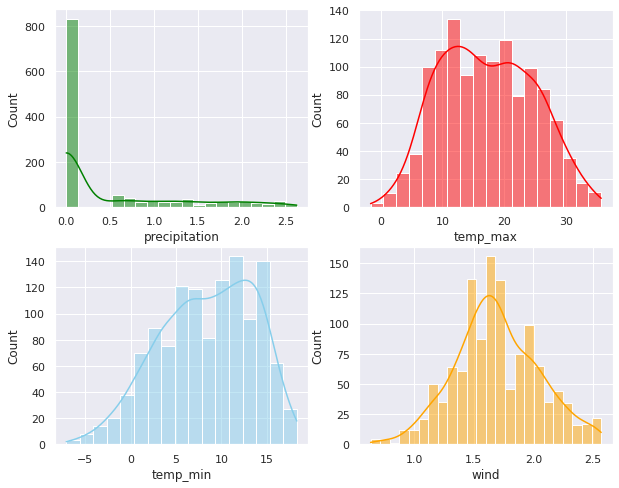

In [18]:
sns.set(style="darkgrid")
fig,axs=plt.subplots(2,2,figsize=(10,8))
sns.histplot(data = df, x = "precipitation", kde = True, ax = axs[0,0], color='green')
sns.histplot(data = df, x = "temp_max", kde = True,ax = axs[0,1], color = 'red')
sns.histplot(data = df, x = "temp_min", kde = True,ax = axs[1,0], color = 'skyblue')
sns.histplot(data = df, x = "wind", kde = True,ax = axs[1,1], color = 'orange')

In [19]:
df.head()

,precipitation,temp_max,temp_min,wind,weather
0,0.000000,12.8,5.0,2.167948,drizzle
2,0.894427,11.7,7.2,1.516575,rain
4,1.140175,8.9,2.8,2.469818,rain
5,1.581139,4.4,2.2,1.483240,rain
6,0.000000,7.2,2.8,1.516575,rain


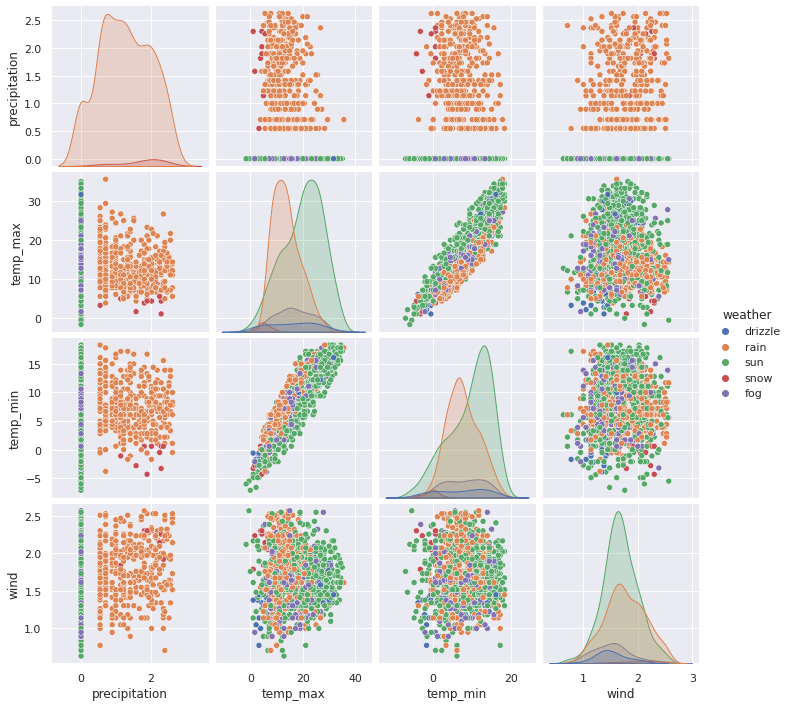

In [20]:
sns.pairplot(data = df, hue = 'weather')

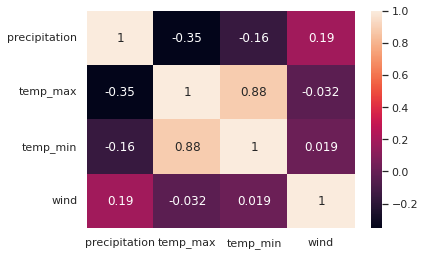

In [21]:
sns.heatmap(data = df.corr(), annot = True)

In [22]:
x = df.drop(['weather'], axis=1)
y = pd.DataFrame(df['weather'])

In [23]:
x.head()

,precipitation,temp_max,temp_min,wind
0,0.000000,12.8,5.0,2.167948
2,0.894427,11.7,7.2,1.516575
4,1.140175,8.9,2.8,2.469818
5,1.581139,4.4,2.2,1.483240
6,0.000000,7.2,2.8,1.516575


In [24]:
y.head()

,weather
0,drizzle
2,rain
4,rain
5,rain
6,rain


In [25]:
encoder = ce.OrdinalEncoder(cols = ['precipitation'	, 'temp_max',	'temp_min',	'wind'])
x = encoder.fit_transform(x)
x.head()

,precipitation,temp_max,temp_min,wind
0,1,1,1,1
2,2,2,2,2
4,3,3,3,3
5,4,4,4,4
6,1,5,3,2


In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [27]:
x_train.head()

,precipitation,temp_max,temp_min,wind
959,1,43,31,31
122,18,23,16,30
989,1,37,34,31
1322,1,29,34,43
1340,1,35,28,33


In [28]:
x_test.head()

,precipitation,temp_max,temp_min,wind
433,1,1,10,9
647,1,22,16,38
947,1,41,34,20
68,11,7,1,31
1162,1,36,19,44


In [29]:
y_train.head()

,weather
959,sun
122,rain
989,sun
1322,sun
1340,sun


In [30]:
y_test.head()

,weather
433,fog
647,sun
947,sun
68,rain
1162,fog


In [31]:
class_names = list(set(y_train['weather']))
class_names

['sun', 'drizzle', 'rain', 'snow', 'fog']

In [32]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((986, 4), (247, 4), (986, 1), (247, 1))

# **Decision Tree**

In [33]:
dt = DecisionTreeClassifier(criterion = 'gini', random_state = 101, ccp_alpha = 0.01)
dt.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.01, random_state=101)

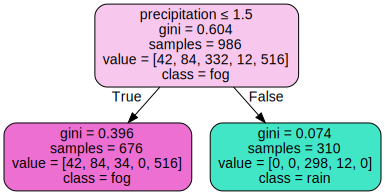

In [34]:
dot_data = tree.export_graphviz(dt, out_file=None,feature_names=x_train.columns, class_names = class_names, filled = True, rounded = True, special_characters = True) 
graph = graphviz.Source(dot_data)
graph

In [35]:
y_pred = dt.predict(x_test)

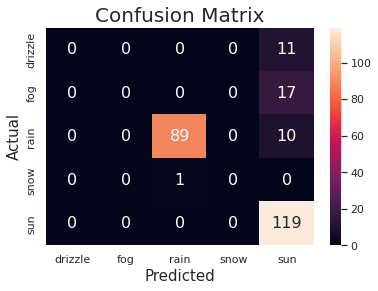

In [36]:
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), columns = dt.classes_, index = dt.classes_)
ax = sns.heatmap(cm, annot = True, annot_kws={"size": 16}, fmt='g')
plt.title('Confusion Matrix', fontsize = 20)
plt.xlabel('Predicted', fontsize = 15)
plt.ylabel('Actual', fontsize = 15)
plt.show()

In [37]:
print(classification_report(y_test, y_pred, target_names = dt.classes_))

              precision    recall  f1-score   support

     drizzle       0.00      0.00      0.00        11
         fog       0.00      0.00      0.00        17
        rain       0.99      0.90      0.94        99
        snow       0.00      0.00      0.00         1
         sun       0.76      1.00      0.86       119

    accuracy                           0.84       247
   macro avg       0.35      0.38      0.36       247
weighted avg       0.76      0.84      0.79       247



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
print(type(cm))
cm = np.asarray(cm)
print(cm)
print(type(cm))

<class 'pandas.core.frame.DataFrame'>
[[  0   0   0   0  11]
 [  0   0   0   0  17]
 [  0   0  89   0  10]
 [  0   0   1   0   0]
 [  0   0   0   0 119]]
<class 'numpy.ndarray'>


In [39]:
FP = cm.sum(axis=0) - np.diag(cm) 
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)
P = TP + FN
N = FP + TN

print("TP:")
print(pd.DataFrame(TP, dt.classes_))
print("\nTN:")
print(pd.DataFrame(TN, dt.classes_))
print("\nFP:")
print(pd.DataFrame(FP, dt.classes_))
print("\nFN:")
print(pd.DataFrame(FN, dt.classes_))
print("\nP:")
print(pd.DataFrame(P, dt.classes_))
print("\nN:")
print(pd.DataFrame(N, dt.classes_))

TP:
           0
drizzle    0
fog        0
rain      89
snow       0
sun      119

TN:
           0
drizzle  236
fog      230
rain     147
snow     246
sun       90

FP:
          0
drizzle   0
fog       0
rain      1
snow      0
sun      38

FN:
          0
drizzle  11
fog      17
rain     10
snow      1
sun       0

P:
           0
drizzle   11
fog       17
rain      99
snow       1
sun      119

N:
           0
drizzle  236
fog      230
rain     148
snow     246
sun      128


In [40]:
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Overall accuracy for each class
ACC = (TP+TN)/(TP+FP+FN+TN)
print("Accuracy:")
print(pd.DataFrame(ACC, dt.classes_))

#Error Rate
ER = (FP+FN)/(TP+FP+FN+TN)
print("\nError:")
print(pd.DataFrame(ER, dt.classes_))

# Sensitivity, recall, or true positive rate
TPR = TP/(TP+FN)
print("\nSensitivity:")
print(pd.DataFrame(TPR, dt.classes_))

# Specificity or true negative rate
TNR = TN/(TN+FP)
print("\nSpecificity:")
print(pd.DataFrame(TNR, dt.classes_))

Accuracy:
                0
drizzle  0.955466
fog      0.931174
rain     0.955466
snow     0.995951
sun      0.846154

Error:
                0
drizzle  0.044534
fog      0.068826
rain     0.044534
snow     0.004049
sun      0.153846

Sensitivity:
               0
drizzle  0.00000
fog      0.00000
rain     0.89899
snow     0.00000
sun      1.00000

Specificity:
                0
drizzle  1.000000
fog      1.000000
rain     0.993243
snow     1.000000
sun      0.703125


# **Bagging Classifier**

In [41]:
bg = BaggingClassifier(random_state = 0)
bg.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BaggingClassifier(random_state=0)

In [42]:
y_pred = bg.predict(x_test)

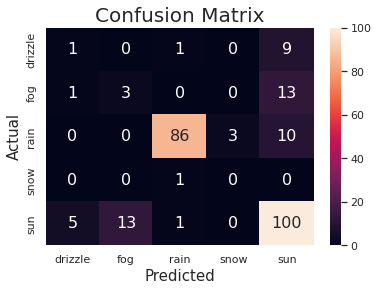

In [43]:
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), columns = bg.classes_, index = bg.classes_)
ax = sns.heatmap(cm, annot = True, annot_kws={"size": 16}, fmt='g')
plt.title('Confusion Matrix', fontsize = 20)
plt.xlabel('Predicted', fontsize = 15)
plt.ylabel('Actual', fontsize = 15)
plt.show()

In [44]:
print(classification_report(y_test, y_pred, target_names = bg.classes_))

              precision    recall  f1-score   support

     drizzle       0.14      0.09      0.11        11
         fog       0.19      0.18      0.18        17
        rain       0.97      0.87      0.91        99
        snow       0.00      0.00      0.00         1
         sun       0.76      0.84      0.80       119

    accuracy                           0.77       247
   macro avg       0.41      0.40      0.40       247
weighted avg       0.77      0.77      0.77       247



In [45]:
print(type(cm))
cm = np.asarray(cm)
print(cm)
print(type(cm))

<class 'pandas.core.frame.DataFrame'>
[[  1   0   1   0   9]
 [  1   3   0   0  13]
 [  0   0  86   3  10]
 [  0   0   1   0   0]
 [  5  13   1   0 100]]
<class 'numpy.ndarray'>


In [46]:
FP = cm.sum(axis=0) - np.diag(cm) 
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)
P = TP + FN
N = FP + TN

print("TP:")
print(pd.DataFrame(TP, bg.classes_))
print("\nTN:")
print(pd.DataFrame(TN, bg.classes_))
print("\nFP:")
print(pd.DataFrame(FP, bg.classes_))
print("\nFN:")
print(pd.DataFrame(FN, bg.classes_))
print("\nP:")
print(pd.DataFrame(P, bg.classes_))
print("\nN:")
print(pd.DataFrame(N, bg.classes_))

TP:
           0
drizzle    1
fog        3
rain      86
snow       0
sun      100

TN:
           0
drizzle  230
fog      217
rain     145
snow     243
sun       96

FP:
          0
drizzle   6
fog      13
rain      3
snow      3
sun      32

FN:
          0
drizzle  10
fog      14
rain     13
snow      1
sun      19

P:
           0
drizzle   11
fog       17
rain      99
snow       1
sun      119

N:
           0
drizzle  236
fog      230
rain     148
snow     246
sun      128


In [47]:
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Overall accuracy for each class
ACC = (TP+TN)/(TP+FP+FN+TN)
print("Accuracy:")
print(pd.DataFrame(ACC, bg.classes_))

#Error Rate
ER = (FP+FN)/(TP+FP+FN+TN)
print("\nError:")
print(pd.DataFrame(ER, bg.classes_))

# Sensitivity, recall, or true positive rate
TPR = TP/(TP+FN)
print("\nSensitivity:")
print(pd.DataFrame(TPR, bg.classes_))

# Specificity or true negative rate
TNR = TN/(TN+FP)
print("\nSpecificity:")
print(pd.DataFrame(TNR, bg.classes_))

Accuracy:
                0
drizzle  0.935223
fog      0.890688
rain     0.935223
snow     0.983806
sun      0.793522

Error:
                0
drizzle  0.064777
fog      0.109312
rain     0.064777
snow     0.016194
sun      0.206478

Sensitivity:
                0
drizzle  0.090909
fog      0.176471
rain     0.868687
snow     0.000000
sun      0.840336

Specificity:
                0
drizzle  0.974576
fog      0.943478
rain     0.979730
snow     0.987805
sun      0.750000


# **Gradient Boosting Classifier**

In [48]:
bs = GradientBoostingClassifier(random_state = 0)
bs.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(random_state=0)

In [49]:
y_pred = bs.predict(x_test)

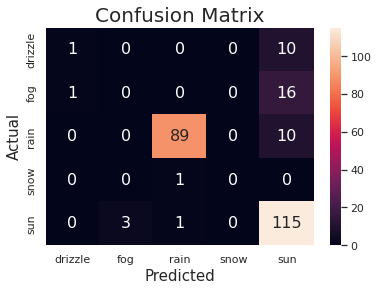

In [50]:
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), columns = bs.classes_, index = bs.classes_)
ax = sns.heatmap(cm, annot = True, annot_kws={"size": 16}, fmt='g')
plt.title('Confusion Matrix', fontsize = 20)
plt.xlabel('Predicted', fontsize = 15)
plt.ylabel('Actual', fontsize = 15)
plt.show()

In [51]:
print(classification_report(y_test, y_pred, target_names = bs.classes_))

              precision    recall  f1-score   support

     drizzle       0.50      0.09      0.15        11
         fog       0.00      0.00      0.00        17
        rain       0.98      0.90      0.94        99
        snow       0.00      0.00      0.00         1
         sun       0.76      0.97      0.85       119

    accuracy                           0.83       247
   macro avg       0.45      0.39      0.39       247
weighted avg       0.78      0.83      0.79       247



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [52]:
print(type(cm))
cm = np.asarray(cm)
print(cm)
print(type(cm))

<class 'pandas.core.frame.DataFrame'>
[[  1   0   0   0  10]
 [  1   0   0   0  16]
 [  0   0  89   0  10]
 [  0   0   1   0   0]
 [  0   3   1   0 115]]
<class 'numpy.ndarray'>


In [53]:
FP = cm.sum(axis=0) - np.diag(cm) 
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)
P = TP + FN
N = FP + TN

print("TP:")
print(pd.DataFrame(TP, bs.classes_))
print("\nTN:")
print(pd.DataFrame(TN, bs.classes_))
print("\nFP:")
print(pd.DataFrame(FP, bs.classes_))
print("\nFN:")
print(pd.DataFrame(FN, bs.classes_))
print("\nP:")
print(pd.DataFrame(P, bs.classes_))
print("\nN:")
print(pd.DataFrame(N, bs.classes_))

TP:
           0
drizzle    1
fog        0
rain      89
snow       0
sun      115

TN:
           0
drizzle  235
fog      227
rain     146
snow     246
sun       92

FP:
          0
drizzle   1
fog       3
rain      2
snow      0
sun      36

FN:
          0
drizzle  10
fog      17
rain     10
snow      1
sun       4

P:
           0
drizzle   11
fog       17
rain      99
snow       1
sun      119

N:
           0
drizzle  236
fog      230
rain     148
snow     246
sun      128


In [54]:
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Overall accuracy for each class
ACC = (TP+TN)/(TP+FP+FN+TN)
print("Accuracy:")
print(pd.DataFrame(ACC, bs.classes_))

#Error Rate
ER = (FP+FN)/(TP+FP+FN+TN)
print("\nError:")
print(pd.DataFrame(ER, bs.classes_))

# Sensitivity, recall, or true positive rate
TPR = TP/(TP+FN)
print("\nSensitivity:")
print(pd.DataFrame(TPR, bs.classes_))

# Specificity or true negative rate
TNR = TN/(TN+FP)
print("\nSpecificity:")
print(pd.DataFrame(TNR, bs.classes_))

Accuracy:
                0
drizzle  0.955466
fog      0.919028
rain     0.951417
snow     0.995951
sun      0.838057

Error:
                0
drizzle  0.044534
fog      0.080972
rain     0.048583
snow     0.004049
sun      0.161943

Sensitivity:
                0
drizzle  0.090909
fog      0.000000
rain     0.898990
snow     0.000000
sun      0.966387

Specificity:
                0
drizzle  0.995763
fog      0.986957
rain     0.986486
snow     1.000000
sun      0.718750


# **Extreme Gradient Boosting Classifier**

In [55]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(objective='multi:softprob')

In [56]:
y_pred = xgb.predict(x_test)

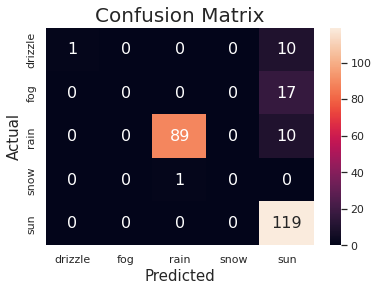

In [57]:
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), columns = xgb.classes_, index = xgb.classes_)
ax = sns.heatmap(cm, annot = True, annot_kws={"size": 16}, fmt='g')
plt.title('Confusion Matrix', fontsize = 20)
plt.xlabel('Predicted', fontsize = 15)
plt.ylabel('Actual', fontsize = 15)
plt.show()

In [58]:
print(classification_report(y_test, y_pred, target_names = xgb.classes_))

              precision    recall  f1-score   support

     drizzle       1.00      0.09      0.17        11
         fog       0.00      0.00      0.00        17
        rain       0.99      0.90      0.94        99
        snow       0.00      0.00      0.00         1
         sun       0.76      1.00      0.87       119

    accuracy                           0.85       247
   macro avg       0.55      0.40      0.39       247
weighted avg       0.81      0.85      0.80       247



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [59]:
print(type(cm))
cm = np.asarray(cm)
print(cm)
print(type(cm))

<class 'pandas.core.frame.DataFrame'>
[[  1   0   0   0  10]
 [  0   0   0   0  17]
 [  0   0  89   0  10]
 [  0   0   1   0   0]
 [  0   0   0   0 119]]
<class 'numpy.ndarray'>


In [60]:
FP = cm.sum(axis=0) - np.diag(cm) 
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)
P = TP + FN
N = FP + TN

print("TP:")
print(pd.DataFrame(TP, xgb.classes_))
print("\nTN:")
print(pd.DataFrame(TN, xgb.classes_))
print("\nFP:")
print(pd.DataFrame(FP, xgb.classes_))
print("\nFN:")
print(pd.DataFrame(FN, xgb.classes_))
print("\nP:")
print(pd.DataFrame(P, xgb.classes_))
print("\nN:")
print(pd.DataFrame(N, xgb.classes_))

TP:
           0
drizzle    1
fog        0
rain      89
snow       0
sun      119

TN:
           0
drizzle  236
fog      230
rain     147
snow     246
sun       91

FP:
          0
drizzle   0
fog       0
rain      1
snow      0
sun      37

FN:
          0
drizzle  10
fog      17
rain     10
snow      1
sun       0

P:
           0
drizzle   11
fog       17
rain      99
snow       1
sun      119

N:
           0
drizzle  236
fog      230
rain     148
snow     246
sun      128


In [61]:
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Overall accuracy for each class
ACC = (TP+TN)/(TP+FP+FN+TN)
print("Accuracy:")
print(pd.DataFrame(ACC, xgb.classes_))

#Error Rate
ER = (FP+FN)/(TP+FP+FN+TN)
print("\nError:")
print(pd.DataFrame(ER, xgb.classes_))

# Sensitivity, recall, or true positive rate
TPR = TP/(TP+FN)
print("\nSensitivity:")
print(pd.DataFrame(TPR, xgb.classes_))

# Specificity or true negative rate
TNR = TN/(TN+FP)
print("\nSpecificity:")
print(pd.DataFrame(TNR, xgb.classes_))

Accuracy:
                0
drizzle  0.959514
fog      0.931174
rain     0.955466
snow     0.995951
sun      0.850202

Error:
                0
drizzle  0.040486
fog      0.068826
rain     0.044534
snow     0.004049
sun      0.149798

Sensitivity:
                0
drizzle  0.090909
fog      0.000000
rain     0.898990
snow     0.000000
sun      1.000000

Specificity:
                0
drizzle  1.000000
fog      1.000000
rain     0.993243
snow     1.000000
sun      0.710938


# **Random Forest Classifier**


In [62]:
rf = RandomForestClassifier(random_state = 0)
rf.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(random_state=0)

In [63]:
y_pred = rf.predict(x_test)

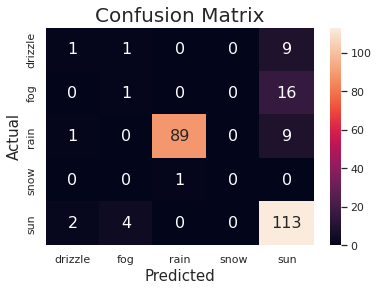

In [64]:
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), columns = dt.classes_, index = rf.classes_)
ax = sns.heatmap(cm, annot = True, annot_kws={"size": 16}, fmt='g')
plt.title('Confusion Matrix', fontsize = 20)
plt.xlabel('Predicted', fontsize = 15)
plt.ylabel('Actual', fontsize = 15)
plt.show()

In [65]:
print(classification_report(y_test, y_pred, target_names = rf.classes_))

              precision    recall  f1-score   support

     drizzle       0.25      0.09      0.13        11
         fog       0.17      0.06      0.09        17
        rain       0.99      0.90      0.94        99
        snow       0.00      0.00      0.00         1
         sun       0.77      0.95      0.85       119

    accuracy                           0.83       247
   macro avg       0.43      0.40      0.40       247
weighted avg       0.79      0.83      0.80       247



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [66]:
print(type(cm))
cm = np.asarray(cm)
print(cm)
print(type(cm))

<class 'pandas.core.frame.DataFrame'>
[[  1   1   0   0   9]
 [  0   1   0   0  16]
 [  1   0  89   0   9]
 [  0   0   1   0   0]
 [  2   4   0   0 113]]
<class 'numpy.ndarray'>


In [67]:
FP = cm.sum(axis=0) - np.diag(cm) 
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)
P = TP + FN
N = FP + TN

print("TP:")
print(pd.DataFrame(TP, rf.classes_))
print("\nTN:")
print(pd.DataFrame(TN, rf.classes_))
print("\nFP:")
print(pd.DataFrame(FP, rf.classes_))
print("\nFN:")
print(pd.DataFrame(FN, rf.classes_))
print("\nP:")
print(pd.DataFrame(P, rf.classes_))
print("\nN:")
print(pd.DataFrame(N, rf.classes_))

TP:
           0
drizzle    1
fog        1
rain      89
snow       0
sun      113

TN:
           0
drizzle  233
fog      225
rain     147
snow     246
sun       94

FP:
          0
drizzle   3
fog       5
rain      1
snow      0
sun      34

FN:
          0
drizzle  10
fog      16
rain     10
snow      1
sun       6

P:
           0
drizzle   11
fog       17
rain      99
snow       1
sun      119

N:
           0
drizzle  236
fog      230
rain     148
snow     246
sun      128


In [68]:
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Overall accuracy for each class
ACC = (TP+TN)/(TP+FP+FN+TN)
print("Accuracy:")
print(pd.DataFrame(ACC, rf.classes_))

#Error Rate
ER = (FP+FN)/(TP+FP+FN+TN)
print("\nError:")
print(pd.DataFrame(ER, rf.classes_))

# Sensitivity, recall, or true positive rate
TPR = TP/(TP+FN)
print("\nSensitivity:")
print(pd.DataFrame(TPR, rf.classes_))

# Specificity or true negative rate
TNR = TN/(TN+FP)
print("\nSpecificity:")
print(pd.DataFrame(TNR, rf.classes_))

Accuracy:
                0
drizzle  0.947368
fog      0.914980
rain     0.955466
snow     0.995951
sun      0.838057

Error:
                0
drizzle  0.052632
fog      0.085020
rain     0.044534
snow     0.004049
sun      0.161943

Sensitivity:
                0
drizzle  0.090909
fog      0.058824
rain     0.898990
snow     0.000000
sun      0.949580

Specificity:
                0
drizzle  0.987288
fog      0.978261
rain     0.993243
snow     1.000000
sun      0.734375


# **Logistic Regression**

In [69]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [70]:
y_pred = lr.predict(x_test)

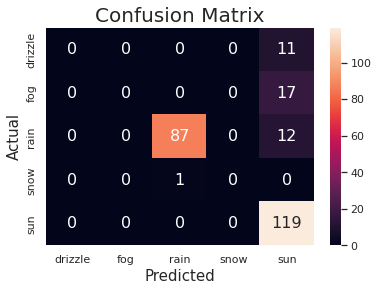

In [71]:
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), columns = lr.classes_, index = lr.classes_)
ax = sns.heatmap(cm, annot = True, annot_kws={"size": 16}, fmt='g')
plt.title('Confusion Matrix', fontsize = 20)
plt.xlabel('Predicted', fontsize = 15)
plt.ylabel('Actual', fontsize = 15)
plt.show()

In [72]:
print(classification_report(y_test, y_pred, target_names = lr.classes_))

              precision    recall  f1-score   support

     drizzle       0.00      0.00      0.00        11
         fog       0.00      0.00      0.00        17
        rain       0.99      0.88      0.93        99
        snow       0.00      0.00      0.00         1
         sun       0.75      1.00      0.86       119

    accuracy                           0.83       247
   macro avg       0.35      0.38      0.36       247
weighted avg       0.76      0.83      0.79       247



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [73]:
print(type(cm))
cm = np.asarray(cm)
print(cm)
print(type(cm))

<class 'pandas.core.frame.DataFrame'>
[[  0   0   0   0  11]
 [  0   0   0   0  17]
 [  0   0  87   0  12]
 [  0   0   1   0   0]
 [  0   0   0   0 119]]
<class 'numpy.ndarray'>


In [74]:
FP = cm.sum(axis=0) - np.diag(cm) 
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)
P = TP + FN
N = FP + TN

print("TP:")
print(pd.DataFrame(TP, lr.classes_))
print("\nTN:")
print(pd.DataFrame(TN, lr.classes_))
print("\nFP:")
print(pd.DataFrame(FP, lr.classes_))
print("\nFN:")
print(pd.DataFrame(FN, lr.classes_))
print("\nP:")
print(pd.DataFrame(P, lr.classes_))
print("\nN:")
print(pd.DataFrame(N, rf.classes_))

TP:
           0
drizzle    0
fog        0
rain      87
snow       0
sun      119

TN:
           0
drizzle  236
fog      230
rain     147
snow     246
sun       88

FP:
          0
drizzle   0
fog       0
rain      1
snow      0
sun      40

FN:
          0
drizzle  11
fog      17
rain     12
snow      1
sun       0

P:
           0
drizzle   11
fog       17
rain      99
snow       1
sun      119

N:
           0
drizzle  236
fog      230
rain     148
snow     246
sun      128


In [75]:
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Overall accuracy for each class
ACC = (TP+TN)/(TP+FP+FN+TN)
print("Accuracy:")
print(pd.DataFrame(ACC, lr.classes_))

#Error Rate
ER = (FP+FN)/(TP+FP+FN+TN)
print("\nError:")
print(pd.DataFrame(ER, lr.classes_))

# Sensitivity, recall, or true positive rate
TPR = TP/(TP+FN)
print("\nSensitivity:")
print(pd.DataFrame(TPR, lr.classes_))

# Specificity or true negative rate
TNR = TN/(TN+FP)
print("\nSpecificity:")
print(pd.DataFrame(TNR, lr.classes_))

Accuracy:
                0
drizzle  0.955466
fog      0.931174
rain     0.947368
snow     0.995951
sun      0.838057

Error:
                0
drizzle  0.044534
fog      0.068826
rain     0.052632
snow     0.004049
sun      0.161943

Sensitivity:
                0
drizzle  0.000000
fog      0.000000
rain     0.878788
snow     0.000000
sun      1.000000

Specificity:
                0
drizzle  1.000000
fog      1.000000
rain     0.993243
snow     1.000000
sun      0.687500


# **SGD Classifier**

In [76]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier()

In [77]:
y_pred = sgd.predict(x_test)

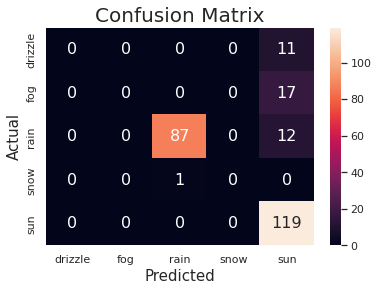

In [78]:
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), columns = sgd.classes_, index = sgd.classes_)
ax = sns.heatmap(cm, annot = True, annot_kws={"size": 16}, fmt='g')
plt.title('Confusion Matrix', fontsize = 20)
plt.xlabel('Predicted', fontsize = 15)
plt.ylabel('Actual', fontsize = 15)
plt.show()

In [79]:
print(classification_report(y_test, y_pred, target_names = sgd.classes_))

              precision    recall  f1-score   support

     drizzle       0.00      0.00      0.00        11
         fog       0.00      0.00      0.00        17
        rain       0.99      0.88      0.93        99
        snow       0.00      0.00      0.00         1
         sun       0.75      1.00      0.86       119

    accuracy                           0.83       247
   macro avg       0.35      0.38      0.36       247
weighted avg       0.76      0.83      0.79       247



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [80]:
print(type(cm))
cm = np.asarray(cm)
print(cm)
print(type(cm))

<class 'pandas.core.frame.DataFrame'>
[[  0   0   0   0  11]
 [  0   0   0   0  17]
 [  0   0  87   0  12]
 [  0   0   1   0   0]
 [  0   0   0   0 119]]
<class 'numpy.ndarray'>


In [81]:
FP = cm.sum(axis=0) - np.diag(cm) 
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)
P = TP + FN
N = FP + TN

print("TP:")
print(pd.DataFrame(TP, sgd.classes_))
print("\nTN:")
print(pd.DataFrame(TN, sgd.classes_))
print("\nFP:")
print(pd.DataFrame(FP, sgd.classes_))
print("\nFN:")
print(pd.DataFrame(FN, sgd.classes_))
print("\nP:")
print(pd.DataFrame(P, sgd.classes_))
print("\nN:")
print(pd.DataFrame(N, sgd.classes_))

TP:
           0
drizzle    0
fog        0
rain      87
snow       0
sun      119

TN:
           0
drizzle  236
fog      230
rain     147
snow     246
sun       88

FP:
          0
drizzle   0
fog       0
rain      1
snow      0
sun      40

FN:
          0
drizzle  11
fog      17
rain     12
snow      1
sun       0

P:
           0
drizzle   11
fog       17
rain      99
snow       1
sun      119

N:
           0
drizzle  236
fog      230
rain     148
snow     246
sun      128


In [82]:
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Overall accuracy for each class
ACC = (TP+TN)/(TP+FP+FN+TN)
print("Accuracy:")
print(pd.DataFrame(ACC, sgd.classes_))

#Error Rate
ER = (FP+FN)/(TP+FP+FN+TN)
print("\nError:")
print(pd.DataFrame(ER, sgd.classes_))

# Sensitivity, recall, or true positive rate
TPR = TP/(TP+FN)
print("\nSensitivity:")
print(pd.DataFrame(TPR, sgd.classes_))

# Specificity or true negative rate
TNR = TN/(TN+FP)
print("\nSpecificity:")
print(pd.DataFrame(TNR, sgd.classes_))

Accuracy:
                0
drizzle  0.955466
fog      0.931174
rain     0.947368
snow     0.995951
sun      0.838057

Error:
                0
drizzle  0.044534
fog      0.068826
rain     0.052632
snow     0.004049
sun      0.161943

Sensitivity:
                0
drizzle  0.000000
fog      0.000000
rain     0.878788
snow     0.000000
sun      1.000000

Specificity:
                0
drizzle  1.000000
fog      1.000000
rain     0.993243
snow     1.000000
sun      0.687500


# **Gaussian Naive Bayes Classifier**

In [83]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [84]:
y_pred = gnb.predict(x_test)

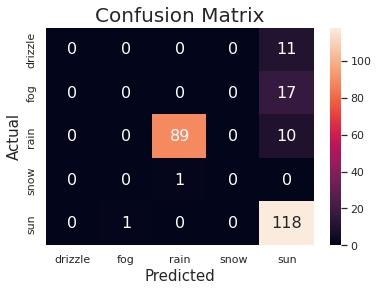

In [85]:
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), columns = gnb.classes_, index = gnb.classes_)
ax = sns.heatmap(cm, annot = True, annot_kws={"size": 16}, fmt='g')
plt.title('Confusion Matrix', fontsize = 20)
plt.xlabel('Predicted', fontsize = 15)
plt.ylabel('Actual', fontsize = 15)
plt.show()

In [86]:
print(classification_report(y_test, y_pred, target_names = gnb.classes_))

              precision    recall  f1-score   support

     drizzle       0.00      0.00      0.00        11
         fog       0.00      0.00      0.00        17
        rain       0.99      0.90      0.94        99
        snow       0.00      0.00      0.00         1
         sun       0.76      0.99      0.86       119

    accuracy                           0.84       247
   macro avg       0.35      0.38      0.36       247
weighted avg       0.76      0.84      0.79       247



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [87]:
print(type(cm))
cm = np.asarray(cm)
print(cm)
print(type(cm))

<class 'pandas.core.frame.DataFrame'>
[[  0   0   0   0  11]
 [  0   0   0   0  17]
 [  0   0  89   0  10]
 [  0   0   1   0   0]
 [  0   1   0   0 118]]
<class 'numpy.ndarray'>


In [88]:
FP = cm.sum(axis=0) - np.diag(cm) 
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)
P = TP + FN
N = FP + TN

print("TP:")
print(pd.DataFrame(TP, gnb.classes_))
print("\nTN:")
print(pd.DataFrame(TN, gnb.classes_))
print("\nFP:")
print(pd.DataFrame(FP, gnb.classes_))
print("\nFN:")
print(pd.DataFrame(FN, gnb.classes_))
print("\nP:")
print(pd.DataFrame(P, gnb.classes_))
print("\nN:")
print(pd.DataFrame(N, gnb.classes_))

TP:
           0
drizzle    0
fog        0
rain      89
snow       0
sun      118

TN:
           0
drizzle  236
fog      229
rain     147
snow     246
sun       90

FP:
          0
drizzle   0
fog       1
rain      1
snow      0
sun      38

FN:
          0
drizzle  11
fog      17
rain     10
snow      1
sun       1

P:
           0
drizzle   11
fog       17
rain      99
snow       1
sun      119

N:
           0
drizzle  236
fog      230
rain     148
snow     246
sun      128


In [89]:
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Overall accuracy for each class
ACC = (TP+TN)/(TP+FP+FN+TN)
print("Accuracy:")
print(pd.DataFrame(ACC, gnb.classes_))

#Error Rate
ER = (FP+FN)/(TP+FP+FN+TN)
print("\nError:")
print(pd.DataFrame(ER, gnb.classes_))

# Sensitivity, recall, or true positive rate
TPR = TP/(TP+FN)
print("\nSensitivity:")
print(pd.DataFrame(TPR, gnb.classes_))

# Specificity or true negative rate
TNR = TN/(TN+FP)
print("\nSpecificity:")
print(pd.DataFrame(TNR, gnb.classes_))

Accuracy:
                0
drizzle  0.955466
fog      0.927126
rain     0.955466
snow     0.995951
sun      0.842105

Error:
                0
drizzle  0.044534
fog      0.072874
rain     0.044534
snow     0.004049
sun      0.157895

Sensitivity:
                0
drizzle  0.000000
fog      0.000000
rain     0.898990
snow     0.000000
sun      0.991597

Specificity:
                0
drizzle  1.000000
fog      0.995652
rain     0.993243
snow     1.000000
sun      0.703125


# **K-Nearest Neighbors**

In [90]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier()
knn.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [91]:
y_pred = knn.predict(x_test)

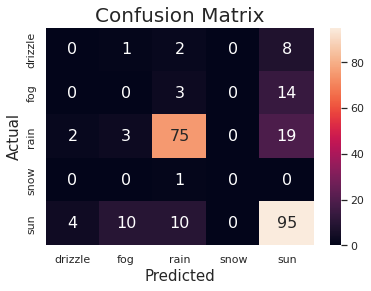

In [92]:
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), columns = knn.classes_, index = knn.classes_)
ax = sns.heatmap(cm, annot = True, annot_kws={"size": 16}, fmt='g')
plt.title('Confusion Matrix', fontsize = 20)
plt.xlabel('Predicted', fontsize = 15)
plt.ylabel('Actual', fontsize = 15)
plt.show()

In [93]:
print(classification_report(y_test, y_pred, target_names = knn.classes_))

              precision    recall  f1-score   support

     drizzle       0.00      0.00      0.00        11
         fog       0.00      0.00      0.00        17
        rain       0.82      0.76      0.79        99
        snow       0.00      0.00      0.00         1
         sun       0.70      0.80      0.75       119

    accuracy                           0.69       247
   macro avg       0.30      0.31      0.31       247
weighted avg       0.67      0.69      0.68       247



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [94]:
print(type(cm))
cm = np.asarray(cm)
print(cm)
print(type(cm))

<class 'pandas.core.frame.DataFrame'>
[[ 0  1  2  0  8]
 [ 0  0  3  0 14]
 [ 2  3 75  0 19]
 [ 0  0  1  0  0]
 [ 4 10 10  0 95]]
<class 'numpy.ndarray'>


In [95]:
FP = cm.sum(axis=0) - np.diag(cm) 
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)
P = TP + FN
N = FP + TN

print("TP:")
print(pd.DataFrame(TP, knn.classes_))
print("\nTN:")
print(pd.DataFrame(TN, knn.classes_))
print("\nFP:")
print(pd.DataFrame(FP, knn.classes_))
print("\nFN:")
print(pd.DataFrame(FN, knn.classes_))
print("\nP:")
print(pd.DataFrame(P, knn.classes_))
print("\nN:")
print(pd.DataFrame(N, knn.classes_))

TP:
          0
drizzle   0
fog       0
rain     75
snow      0
sun      95

TN:
           0
drizzle  230
fog      216
rain     132
snow     246
sun       87

FP:
          0
drizzle   6
fog      14
rain     16
snow      0
sun      41

FN:
          0
drizzle  11
fog      17
rain     24
snow      1
sun      24

P:
           0
drizzle   11
fog       17
rain      99
snow       1
sun      119

N:
           0
drizzle  236
fog      230
rain     148
snow     246
sun      128


In [96]:
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Overall accuracy for each class
ACC = (TP+TN)/(TP+FP+FN+TN)
print("Accuracy:")
print(pd.DataFrame(ACC, knn.classes_))

#Error Rate
ER = (FP+FN)/(TP+FP+FN+TN)
print("\nError:")
print(pd.DataFrame(ER, knn.classes_))

# Sensitivity, recall, or true positive rate
TPR = TP/(TP+FN)
print("\nSensitivity:")
print(pd.DataFrame(TPR, knn.classes_))

# Specificity or true negative rate
TNR = TN/(TN+FP)
print("\nSpecificity:")
print(pd.DataFrame(TNR, knn.classes_))

Accuracy:
                0
drizzle  0.931174
fog      0.874494
rain     0.838057
snow     0.995951
sun      0.736842

Error:
                0
drizzle  0.068826
fog      0.125506
rain     0.161943
snow     0.004049
sun      0.263158

Sensitivity:
                0
drizzle  0.000000
fog      0.000000
rain     0.757576
snow     0.000000
sun      0.798319

Specificity:
                0
drizzle  0.974576
fog      0.939130
rain     0.891892
snow     1.000000
sun      0.679688


# **Support Vector Machine Classifier**

In [97]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [98]:
y_pred = svc.predict(x_test)

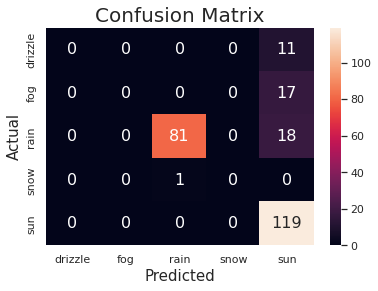

In [99]:
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), columns = svc.classes_, index = svc.classes_)
ax = sns.heatmap(cm, annot = True, annot_kws={"size": 16}, fmt='g')
plt.title('Confusion Matrix', fontsize = 20)
plt.xlabel('Predicted', fontsize = 15)
plt.ylabel('Actual', fontsize = 15)
plt.show()

In [100]:
print(classification_report(y_test, y_pred, target_names = svc.classes_))

              precision    recall  f1-score   support

     drizzle       0.00      0.00      0.00        11
         fog       0.00      0.00      0.00        17
        rain       0.99      0.82      0.90        99
        snow       0.00      0.00      0.00         1
         sun       0.72      1.00      0.84       119

    accuracy                           0.81       247
   macro avg       0.34      0.36      0.35       247
weighted avg       0.74      0.81      0.76       247



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [101]:
print(type(cm))
cm = np.asarray(cm)
print(cm)
print(type(cm))

<class 'pandas.core.frame.DataFrame'>
[[  0   0   0   0  11]
 [  0   0   0   0  17]
 [  0   0  81   0  18]
 [  0   0   1   0   0]
 [  0   0   0   0 119]]
<class 'numpy.ndarray'>


In [102]:
FP = cm.sum(axis=0) - np.diag(cm) 
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)
P = TP + FN
N = FP + TN

print("TP:")
print(pd.DataFrame(TP, svc.classes_))
print("\nTN:")
print(pd.DataFrame(TN, svc.classes_))
print("\nFP:")
print(pd.DataFrame(FP, svc.classes_))
print("\nFN:")
print(pd.DataFrame(FN, svc.classes_))
print("\nP:")
print(pd.DataFrame(P, svc.classes_))
print("\nN:")
print(pd.DataFrame(N, svc.classes_))

TP:
           0
drizzle    0
fog        0
rain      81
snow       0
sun      119

TN:
           0
drizzle  236
fog      230
rain     147
snow     246
sun       82

FP:
          0
drizzle   0
fog       0
rain      1
snow      0
sun      46

FN:
          0
drizzle  11
fog      17
rain     18
snow      1
sun       0

P:
           0
drizzle   11
fog       17
rain      99
snow       1
sun      119

N:
           0
drizzle  236
fog      230
rain     148
snow     246
sun      128


In [103]:
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Overall accuracy for each class
ACC = (TP+TN)/(TP+FP+FN+TN)
print("Accuracy:")
print(pd.DataFrame(ACC, svc.classes_))

#Error Rate
ER = (FP+FN)/(TP+FP+FN+TN)
print("\nError:")
print(pd.DataFrame(ER, svc.classes_))

# Sensitivity, recall, or true positive rate
TPR = TP/(TP+FN)
print("\nSensitivity:")
print(pd.DataFrame(TPR, svc.classes_))

# Specificity or true negative rate
TNR = TN/(TN+FP)
print("\nSpecificity:")
print(pd.DataFrame(TNR, svc.classes_))

Accuracy:
                0
drizzle  0.955466
fog      0.931174
rain     0.923077
snow     0.995951
sun      0.813765

Error:
                0
drizzle  0.044534
fog      0.068826
rain     0.076923
snow     0.004049
sun      0.186235

Sensitivity:
                0
drizzle  0.000000
fog      0.000000
rain     0.818182
snow     0.000000
sun      1.000000

Specificity:
                0
drizzle  1.000000
fog      1.000000
rain     0.993243
snow     1.000000
sun      0.640625


# **ANN**

In [190]:
#Performing Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_nn = sc.fit_transform(x_train)
x_test_nn = sc.transform(x_test)

In [191]:
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier(solver='lbfgs', alpha = 1e-5, hidden_layer_sizes=(16,8), random_state=1, activation='relu', learning_rate='constant', learning_rate_init=0.01, max_iter=5000,tol=0.0001, momentum=0.8)
nn.fit(x_train_nn, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



MLPClassifier(alpha=1e-05, hidden_layer_sizes=(16, 8), learning_rate_init=0.01,
              max_iter=5000, momentum=0.8, random_state=1, solver='lbfgs')

In [192]:
y_pred = nn.predict(x_test_nn)
loss_nn = nn.loss_
loss_nn

0.3955346397069229

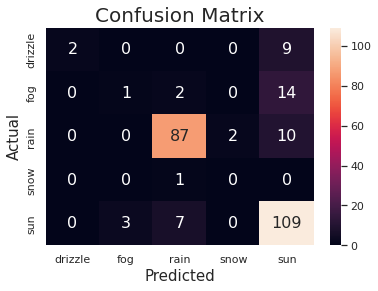

In [193]:
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), columns = nn.classes_, index = nn.classes_)
ax = sns.heatmap(cm, annot = True, annot_kws={"size": 16}, fmt='g')
plt.title('Confusion Matrix', fontsize = 20)
plt.xlabel('Predicted', fontsize = 15)
plt.ylabel('Actual', fontsize = 15)
plt.show()

In [194]:
print(classification_report(y_test, y_pred, target_names = nn.classes_))

              precision    recall  f1-score   support

     drizzle       1.00      0.18      0.31        11
         fog       0.25      0.06      0.10        17
        rain       0.90      0.88      0.89        99
        snow       0.00      0.00      0.00         1
         sun       0.77      0.92      0.84       119

    accuracy                           0.81       247
   macro avg       0.58      0.41      0.43       247
weighted avg       0.79      0.81      0.78       247



In [195]:
print(type(cm))
cm = np.asarray(cm)
print(cm)
print(type(cm))

<class 'pandas.core.frame.DataFrame'>
[[  2   0   0   0   9]
 [  0   1   2   0  14]
 [  0   0  87   2  10]
 [  0   0   1   0   0]
 [  0   3   7   0 109]]
<class 'numpy.ndarray'>


In [196]:
FP = cm.sum(axis=0) - np.diag(cm) 
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)
P = TP + FN
N = FP + TN

print("TP:")
print(pd.DataFrame(TP, nn.classes_))
print("\nTN:")
print(pd.DataFrame(TN, nn.classes_))
print("\nFP:")
print(pd.DataFrame(FP, nn.classes_))
print("\nFN:")
print(pd.DataFrame(FN, nn.classes_))
print("\nP:")
print(pd.DataFrame(P, nn.classes_))
print("\nN:")
print(pd.DataFrame(N, nn.classes_))

TP:
           0
drizzle    2
fog        1
rain      87
snow       0
sun      109

TN:
           0
drizzle  236
fog      227
rain     138
snow     244
sun       95

FP:
          0
drizzle   0
fog       3
rain     10
snow      2
sun      33

FN:
          0
drizzle   9
fog      16
rain     12
snow      1
sun      10

P:
           0
drizzle   11
fog       17
rain      99
snow       1
sun      119

N:
           0
drizzle  236
fog      230
rain     148
snow     246
sun      128


In [197]:
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Overall accuracy for each class
ACC = (TP+TN)/(TP+FP+FN+TN)
print("Accuracy:")
print(pd.DataFrame(ACC, nn.classes_))

#Error Rate
ER = (FP+FN)/(TP+FP+FN+TN)
print("\nError:")
print(pd.DataFrame(ER, nn.classes_))

# Sensitivity, recall, or true positive rate
TPR = TP/(TP+FN)
print("\nSensitivity:")
print(pd.DataFrame(TPR, nn.classes_))

# Specificity or true negative rate
TNR = TN/(TN+FP)
print("\nSpecificity:")
print(pd.DataFrame(TNR, nn.classes_))

Accuracy:
                0
drizzle  0.963563
fog      0.923077
rain     0.910931
snow     0.987854
sun      0.825911

Error:
                0
drizzle  0.036437
fog      0.076923
rain     0.089069
snow     0.012146
sun      0.174089

Sensitivity:
                0
drizzle  0.181818
fog      0.058824
rain     0.878788
snow     0.000000
sun      0.915966

Specificity:
                0
drizzle  1.000000
fog      0.986957
rain     0.932432
snow     0.991870
sun      0.742188


# **Comparison**

In [198]:
from sklearn.metrics import accuracy_score
dict_scores = dict()
models = [dt,bg,bs,xgb,rf,lr,sgd,gnb,knn,svc,nn]
model_names = ['Decision Tree Classifier', 'Bagging Classifier','Gradient Boosting Classifier',
               'Extreme Gradient Boosting Classifier','Random Forest Classifier','Logistic Regression Classifier',
               'SGD Classifier','Gaussian Naive Bayes Classifier','K Nearest Neighbors Classifier', 'SVM Classifier','ANN Classifier']
for i, x in enumerate(models):
  print(x)
  y_pred = x.predict(x_test)
  print(accuracy_score(y_test, y_pred))
  dict_scores[model_names[i]] = accuracy_score(y_test, y_pred)

DecisionTreeClassifier(ccp_alpha=0.01, random_state=101)
0.8421052631578947
BaggingClassifier(random_state=0)
0.7692307692307693
GradientBoostingClassifier(random_state=0)
0.8299595141700404
XGBClassifier(objective='multi:softprob')
0.8461538461538461
RandomForestClassifier(random_state=0)
0.8259109311740891
LogisticRegression()
0.8340080971659919
SGDClassifier()
0.8340080971659919
GaussianNB()
0.8380566801619433
KNeighborsClassifier()
0.6882591093117408
SVC()
0.8097165991902834
MLPClassifier(alpha=1e-05, hidden_layer_sizes=(16, 8), learning_rate_init=0.01,
              max_iter=5000, momentum=0.8, random_state=1, solver='lbfgs')
0.7165991902834008


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning:

X has feature names, but MLPClassifier was fitted without feature names



In [199]:
dict_scores = pd.DataFrame(dict_scores, index=[0])
dict_scores = dict_scores.transpose()
print(dict_scores)
dict_scores.shape

                                             0
Decision Tree Classifier              0.842105
Bagging Classifier                    0.769231
Gradient Boosting Classifier          0.829960
Extreme Gradient Boosting Classifier  0.846154
Random Forest Classifier              0.825911
Logistic Regression Classifier        0.834008
SGD Classifier                        0.834008
Gaussian Naive Bayes Classifier       0.838057
K Nearest Neighbors Classifier        0.688259
SVM Classifier                        0.809717
ANN Classifier                        0.716599


(11, 1)

In [200]:
dict_scores = dict_scores.reset_index()
list(dict_scores)
dict_scores.columns = ['Models', 'Accuracy Scores']
dict_scores

,Models,Accuracy Scores
0,Decision Tree Classifier,0.842105
1,Bagging Classifier,0.769231
2,Gradient Boosting Classifier,0.829960
3,Extreme Gradient Boosting Classifier,0.846154
4,Random Forest Classifier,0.825911
5,Logistic Regression Classifier,0.834008
6,SGD Classifier,0.834008
7,Gaussian Naive Bayes Classifier,0.838057
8,K Nearest Neighbors Classifier,0.688259
9,SVM Classifier,0.809717


In [201]:
import plotly.express as px
fig = px.bar(dict_scores, x = "Models", y = "Accuracy Scores", color = 'Models', text_auto = True)
fig.show()